# Classification Review - Binary Classification
### Binary LR, LDA, QDA, KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import auc, confusion_matrix, classification_report, precision_score, roc_curve
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score, plot_confusion_matrix

from sklearn.model_selection import train_test_split, KFold, cross_val_score

## Breast Cancer Dataset
Data source: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [3]:
breast_cancer_data = pd.read_csv("Data/breast_cancer_dataset.csv", na_values='?').drop(['Unnamed: 32', 'id'], axis = 1)
breast_cancer_data.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [4]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
number_of_unique_classes = np.unique(np.array(breast_cancer_data.diagnosis))
print("Unique classes in response: %s" % number_of_unique_classes)

Unique classes in response: ['B' 'M']


In [6]:
categorical_variable_colnames = ["diagnosis"]

In [7]:
categorical_label_encoder = LabelEncoder()
breast_cancer_data["diagnosis"] = categorical_label_encoder.fit_transform(breast_cancer_data["diagnosis"])

In [8]:
print("Unique classes in response: %s" % np.unique(np.array(breast_cancer_data.diagnosis)))

Unique classes in response: [0 1]


In [9]:
breast_cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


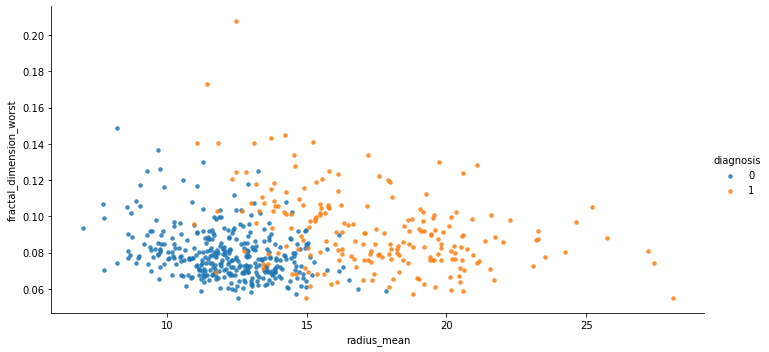

In [10]:
sns.lmplot(y = "fractal_dimension_worst", x = "radius_mean", data = breast_cancer_data, 
           hue = 'diagnosis',fit_reg=False, scatter_kws = {'s':12}, aspect = 2)
plt.show()

In [11]:
X = breast_cancer_data.drop(['diagnosis'], axis = 1)
y = breast_cancer_data['diagnosis'].values

In [12]:
print("X has shapes: %s, y has shape: %s" % (X.shape, y.shape))

X has shapes: (569, 30), y has shape: (569,)


## Logistic Regression

In [13]:
X_Train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [14]:
print("Train feature set shape: %s, Test feature set shape: %s " % (X_Train.shape, X_test.shape))
print("Train set labels shape: %s, Test set labels shape: %s " % (y_train.shape, y_test.shape))

Train feature set shape: (455, 30), Test feature set shape: (114, 30) 
Train set labels shape: (455,), Test set labels shape: (114,) 


In [15]:
c_param_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

score_results_lr = []

for val in c_param_list:
    log_reg = LogisticRegression(penalty = 'l2', max_iter=100000, C = val, solver = 'lbfgs')
    kfold = KFold(n_splits=10)
    score = cross_val_score(log_reg, X_Train, y_train, cv = kfold, scoring = "accuracy")
    score_results_lr.append(score)
    print("C val: %s, CV Score Avg: %s " % (val, np.mean(score)))

C val: 0.0001, CV Score Avg: 0.9297101449275361 
C val: 0.001, CV Score Avg: 0.9473429951690822 
C val: 0.01, CV Score Avg: 0.9495652173913044 
C val: 0.1, CV Score Avg: 0.9517391304347826 
C val: 1, CV Score Avg: 0.9560869565217391 
C val: 10, CV Score Avg: 0.9582608695652175 
C val: 100, CV Score Avg: 0.9604830917874396 
C val: 1000, CV Score Avg: 0.9605797101449275 


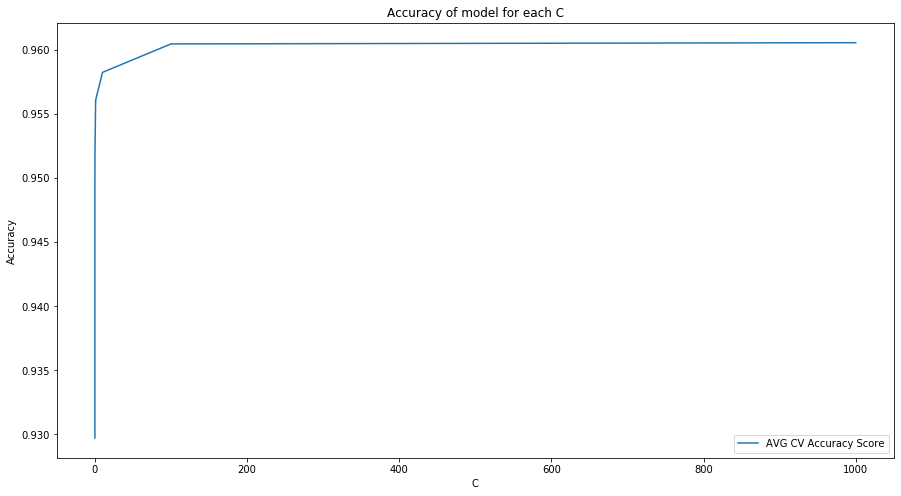

In [16]:
plt.figure(figsize = (15,8)) 
plt.plot(c_param_list, np.mean(np.array(score_results_lr), axis = 1), label = "AVG CV Accuracy Score")
plt.title("Accuracy of model for each C")
plt.xlabel("C")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [17]:
avg_cv_scores = np.mean(np.array(score_results_lr), axis = 1)
max_avg_accuracy_index = np.argmax(avg_cv_scores) 
print("Optimal Value of C: %s" % c_param_list[max_avg_accuracy_index]) # Note: So optimal lambda=1/C

Optimal Value of C: 1000


In [18]:
log_reg_optimal = LogisticRegression(penalty = 'l2', max_iter=100000, C = val, solver = 'lbfgs')
opt_mod_log_reg = log_reg_optimal.fit(X,y)
log_reg_optimal.fit(X,y)

y_pred_lr = opt_mod_log_reg.predict(X)
pred_prob_lr = opt_mod_log_reg.predict_proba(X)

In [19]:
print(confusion_matrix(y, y_pred_lr))

[[353   4]
 [  4 208]]


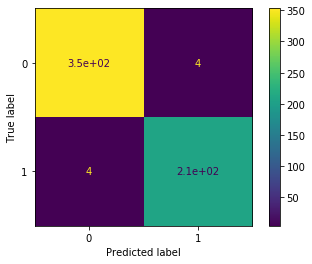

<Figure size 1080x360 with 0 Axes>

In [20]:
plot_confusion_matrix(log_reg_optimal, X, y, display_labels = np.array([0,1]))
plt.figure(figsize = (15,5))
plt.show()

In [21]:
print(classification_report(y, y_pred_lr, digits = 6))

              precision    recall  f1-score   support

           0   0.988796  0.988796  0.988796       357
           1   0.981132  0.981132  0.981132       212

    accuracy                       0.985940       569
   macro avg   0.984964  0.984964  0.984964       569
weighted avg   0.985940  0.985940  0.985940       569



In [22]:
fpr0_lr, tpr0_lr, thresholds0_lr = roc_curve(y, pred_prob_lr[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_lr, tpr0_lr))

fpr1_lr, tpr1_lr, thresholds1_lr = roc_curve(y, pred_prob_lr[:,1], pos_label = 1)
print("ROC: AUC Class 1: ", auc(fpr1_lr, tpr1_lr))


p0_lr, r0_lr, thresholds0_lr = precision_recall_curve(y, pred_prob_lr[:,0], pos_label = 0)
print("Precision-Recall: AUC Class 1:", auc(r0_lr, p0_lr))

p1_lr, r1_lr, thresholds1_lr = precision_recall_curve(y, pred_prob_lr[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_lr, p1_lr))

ROC: AUC Class 0:  0.9981898419745255
ROC: AUC Class 1:  0.9981898419745256
Precision-Recall: AUC Class 1: 0.9988202377697487
Precision-Recall: AUC Class 1: 0.997591507768372


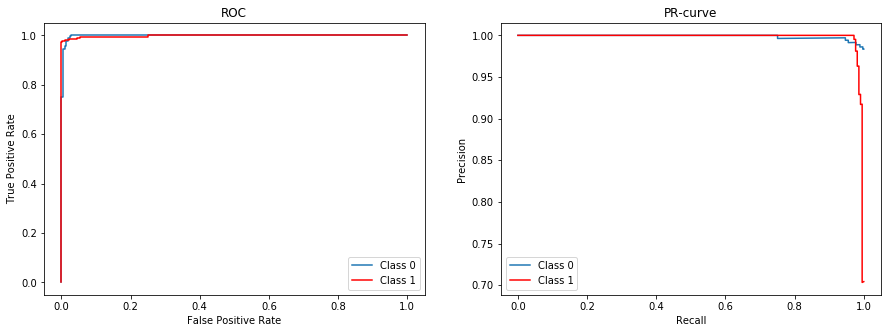

In [23]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(fpr0_lr, tpr0_lr, "-", label = "Class 0")
plt.plot(fpr1_lr, tpr1_lr, "-", color = 'r', label = "Class 1")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(1,2,2)
plt.plot(r0_lr, p0_lr, "-", label = "Class 0")
plt.plot(r1_lr, p1_lr, "-", color = 'r', label = "Class 1")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-curve")

plt.show()

## Linear Discriminant Analysis

In [24]:
linear_discriminant_analysis = LinearDiscriminantAnalysis()
mod_lda = linear_discriminant_analysis.fit(X,y)
linear_discriminant_analysis.fit(X,y)

y_pred_lda = mod_lda.predict(X)
pred_prob_lda = mod_lda.predict_proba(X)

In [25]:
print(confusion_matrix(y, y_pred_lda))

[[355   2]
 [ 18 194]]


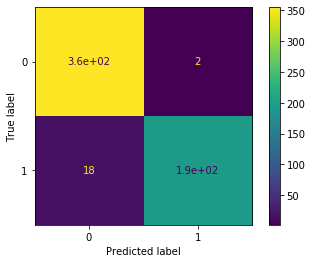

<Figure size 1080x360 with 0 Axes>

In [26]:
plot_confusion_matrix(linear_discriminant_analysis, X, y, display_labels = np.array([0,1]))
plt.figure(figsize = (15,5))
plt.show()

In [27]:
print(classification_report(y, y_pred_lda, digits = 6))

              precision    recall  f1-score   support

           0   0.951743  0.994398  0.972603       357
           1   0.989796  0.915094  0.950980       212

    accuracy                       0.964851       569
   macro avg   0.970769  0.954746  0.961792       569
weighted avg   0.965921  0.964851  0.964547       569



In [28]:
fpr0_lda, tpr0_lda, thresholds0_lda = roc_curve(y, pred_prob_lda[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_lda, tpr0_lda))

fpr1_lda, tpr1_lda, thresholds1_lda = roc_curve(y, pred_prob_lda[:,1], pos_label = 1)
print("ROC: AUC Class 1: ", auc(fpr1_lda, tpr1_lda))


p0_lda, r0_lda, thresholds0_lda = precision_recall_curve(y, pred_prob_lda[:,0], pos_label = 0)
print("Precision-Recall: AUC Class 1:", auc(r0_lda, p0_lda))

p1_lda, r1_lda, thresholds1_lda = precision_recall_curve(y, pred_prob_lda[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_lda, p1_lda))

ROC: AUC Class 0:  0.9965250251043813
ROC: AUC Class 1:  0.9965250251043813
Precision-Recall: AUC Class 1: 0.9977989501806813
Precision-Recall: AUC Class 1: 0.9950896319243632


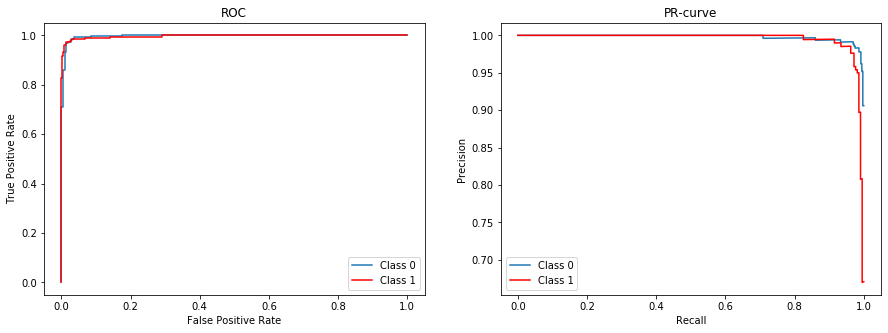

In [29]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(fpr0_lda, tpr0_lda, "-", label = "Class 0")
plt.plot(fpr1_lda, tpr1_lda, "-", color = 'r', label = "Class 1")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(1,2,2)
plt.plot(r0_lda, p0_lda, "-", label = "Class 0")
plt.plot(r1_lda, p1_lda, "-", color = 'r', label = "Class 1")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-curve")

plt.show()

## Quadratic Discriminant Analysis

In [30]:
quadratic_discriminant_analysis = QuadraticDiscriminantAnalysis()
mod_qda = quadratic_discriminant_analysis.fit(X,y)
quadratic_discriminant_analysis.fit(X,y)

y_pred_qda = mod_qda.predict(X)
pred_prob_qda = mod_qda.predict_proba(X)

In [31]:
print(confusion_matrix(y, y_pred_qda))

[[352   5]
 [ 10 202]]


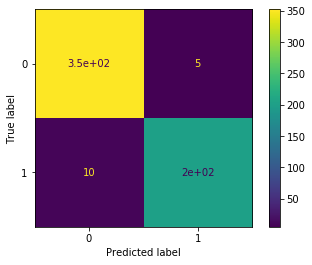

<Figure size 1080x360 with 0 Axes>

In [32]:
plot_confusion_matrix(quadratic_discriminant_analysis, X, y, display_labels = np.array([0,1]))
plt.figure(figsize = (15,5))
plt.show()

In [33]:
print(classification_report(y, y_pred_qda, digits = 6))

              precision    recall  f1-score   support

           0   0.972376  0.985994  0.979138       357
           1   0.975845  0.952830  0.964200       212

    accuracy                       0.973638       569
   macro avg   0.974111  0.969412  0.971669       569
weighted avg   0.973668  0.973638  0.973572       569



In [34]:
fpr0_qda, tpr0_qda, thresholds0_qda = roc_curve(y, pred_prob_qda[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_qda,tpr0_qda))

fpr1_qda, tpr1_qda, thresholds1_qda = roc_curve(y, pred_prob_qda[:,1], pos_label = 1)
print("ROC: AUC Class 1: ", auc(fpr1_qda,tpr1_qda))


p0_qda, r0_qda, thresholds0_qda = precision_recall_curve(y, pred_prob_qda[:,0], pos_label = 0)
print("Precision-Recall: AUC Class 1:", auc(r0_qda,p0_qda))

p1_qda, r1_qda, thresholds1_qda = precision_recall_curve(y, pred_prob_qda[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_qda,p1_qda))

ROC: AUC Class 0:  0.9963004069552348
ROC: AUC Class 1:  0.9953490830294383
Precision-Recall: AUC Class 1: 0.9978342634050497
Precision-Recall: AUC Class 1: 0.9919855320167568


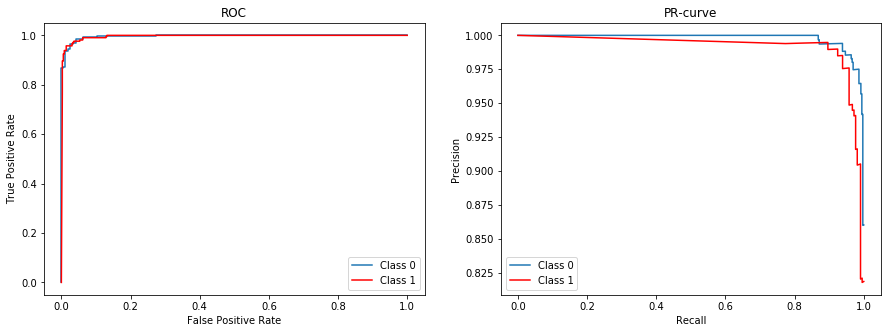

In [35]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(fpr0_qda, tpr0_qda, "-", label = "Class 0")
plt.plot(fpr1_qda, tpr1_qda, "-", color = 'r', label = "Class 1")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(1,2,2)
plt.plot(r0_qda, p0_qda, "-", label = "Class 0")
plt.plot(r1_qda, p1_qda, "-", color = 'r', label = "Class 1")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-curve")

plt.show()

## k-NN

In [36]:
X_Train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)

In [37]:
print("Train feature set shape: %s, Test feature set shape: %s " % (X_Train.shape, X_test.shape))
print("Train set labels shape: %s, Test set labels shape: %s " % (y_train.shape, y_test.shape))

Train feature set shape: (455, 30), Test feature set shape: (114, 30) 
Train set labels shape: (455,), Test set labels shape: (114,) 


In [38]:
k_value_list = np.arange(1,26)
score_results_knn = []

for val in k_value_list:
    knn = KNeighborsClassifier(n_neighbors=val)
    kfold = KFold(n_splits=10)
    score = cross_val_score(knn, X_Train, y_train, cv = kfold, scoring = "accuracy")
    score_results_knn.append(score)
    print("k val: %s, CV Score Avg: %s " % (val, np.mean(score)))

k val: 1, CV Score Avg: 0.9295652173913043 
k val: 2, CV Score Avg: 0.9384541062801933 
k val: 3, CV Score Avg: 0.945024154589372 
k val: 4, CV Score Avg: 0.9405797101449276 
k val: 5, CV Score Avg: 0.9449758454106281 
k val: 6, CV Score Avg: 0.9449758454106281 
k val: 7, CV Score Avg: 0.9515458937198067 
k val: 8, CV Score Avg: 0.9471980676328503 
k val: 9, CV Score Avg: 0.9493719806763286 
k val: 10, CV Score Avg: 0.9471497584541064 
k val: 11, CV Score Avg: 0.9471497584541064 
k val: 12, CV Score Avg: 0.9427536231884058 
k val: 13, CV Score Avg: 0.9471497584541064 
k val: 14, CV Score Avg: 0.9427536231884058 
k val: 15, CV Score Avg: 0.9471497584541064 
k val: 16, CV Score Avg: 0.9449758454106281 
k val: 17, CV Score Avg: 0.9449758454106281 
k val: 18, CV Score Avg: 0.9428019323671497 
k val: 19, CV Score Avg: 0.9428019323671497 
k val: 20, CV Score Avg: 0.9384057971014492 
k val: 21, CV Score Avg: 0.9449758454106281 
k val: 22, CV Score Avg: 0.9406280193236715 
k val: 23, CV Score 

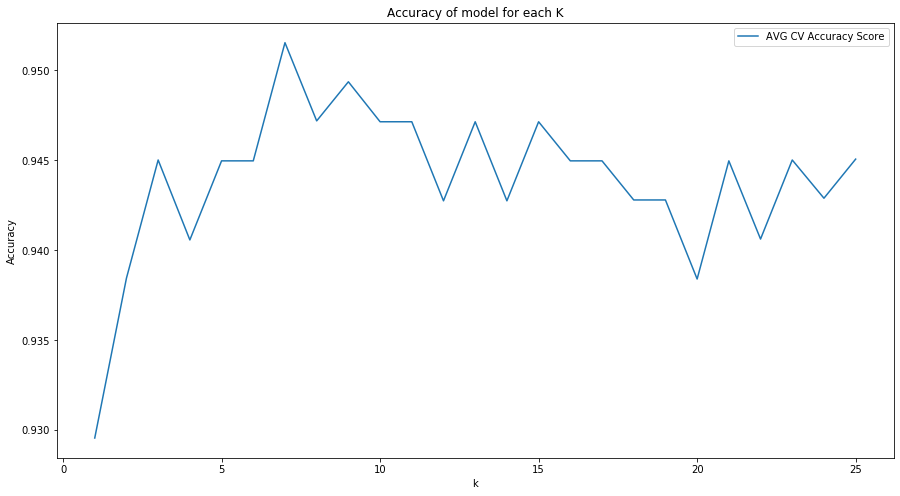

In [39]:
plt.figure(figsize = (15,8)) 
plt.plot(k_value_list, np.mean(np.array(score_results_knn), axis = 1), label = "AVG CV Accuracy Score")
plt.title("Accuracy of model for each K")
plt.xlabel("k")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [40]:
avg_cv_scores_knn = np.mean(np.array(score_results_knn), axis = 1)
max_avg_accuracy_index_knn = np.argmax(avg_cv_scores_knn) 
print("Optimal Value of k: %s" % k_value_list[max_avg_accuracy_index_knn]) 

Optimal Value of k: 7


In [41]:
knn_optimal = KNeighborsClassifier(n_neighbors=7)
opt_mod_knn = knn_optimal.fit(X,y)
knn_optimal.fit(X,y)

y_pred_knn = opt_mod_knn.predict(X)
pred_prob_knn = opt_mod_knn.predict_proba(X)

In [42]:
print(confusion_matrix(y, y_pred_knn))

[[346  11]
 [ 21 191]]


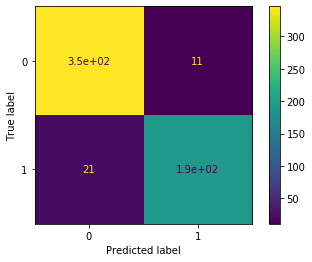

<Figure size 1080x360 with 0 Axes>

In [43]:
plot_confusion_matrix(knn_optimal, X, y, display_labels = np.array([0,1]))
plt.figure(figsize = (15,5))
plt.show()

In [44]:
print(classification_report(y, y_pred_knn, digits = 6))

              precision    recall  f1-score   support

           0   0.942779  0.969188  0.955801       357
           1   0.945545  0.900943  0.922705       212

    accuracy                       0.943761       569
   macro avg   0.944162  0.935066  0.939253       569
weighted avg   0.943810  0.943761  0.943470       569



In [45]:
fpr0_knn, tpr0_knn, thresholds0_knn = roc_curve(y, pred_prob_knn[:,0], pos_label = 0) 
print("ROC: AUC Class 0: ", auc(fpr0_knn, tpr0_knn))

fpr1_knn, tpr1_knn, thresholds1_knn = roc_curve(y, pred_prob_knn[:,1], pos_label = 1)
print("ROC: AUC Class 1: ", auc(fpr1_knn, tpr1_knn))


p0_knn, r0_knn, thresholds0_knn = precision_recall_curve(y, pred_prob_knn[:,0], pos_label = 0)
print("Precision-Recall: AUC Class 1:", auc(r0_knn, p0_knn))

p1_knn, r1_knn, thresholds1_knn = precision_recall_curve(y, pred_prob_knn[:,1], pos_label = 1)
print("Precision-Recall: AUC Class 1:", auc(r1_knn, p1_knn))

ROC: AUC Class 0:  0.9894033084932086
ROC: AUC Class 1:  0.9894033084932086
Precision-Recall: AUC Class 1: 0.993826209830051
Precision-Recall: AUC Class 1: 0.983893043287082


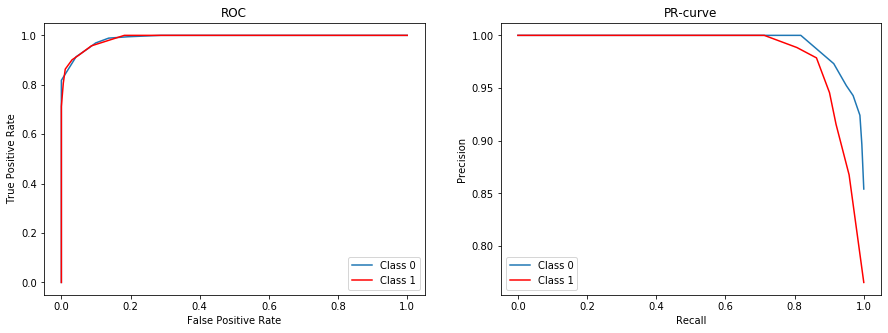

In [46]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(fpr0_knn, tpr0_knn, "-", label = "Class 0")
plt.plot(fpr1_knn, tpr1_knn, "-", color = 'r', label = "Class 1")
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(1,2,2)
plt.plot(r0_knn, p0_knn, "-", label = "Class 0")
plt.plot(r1_knn, p1_knn, "-", color = 'r', label = "Class 1")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR-curve")

plt.show()

## Classification Models ROC curves

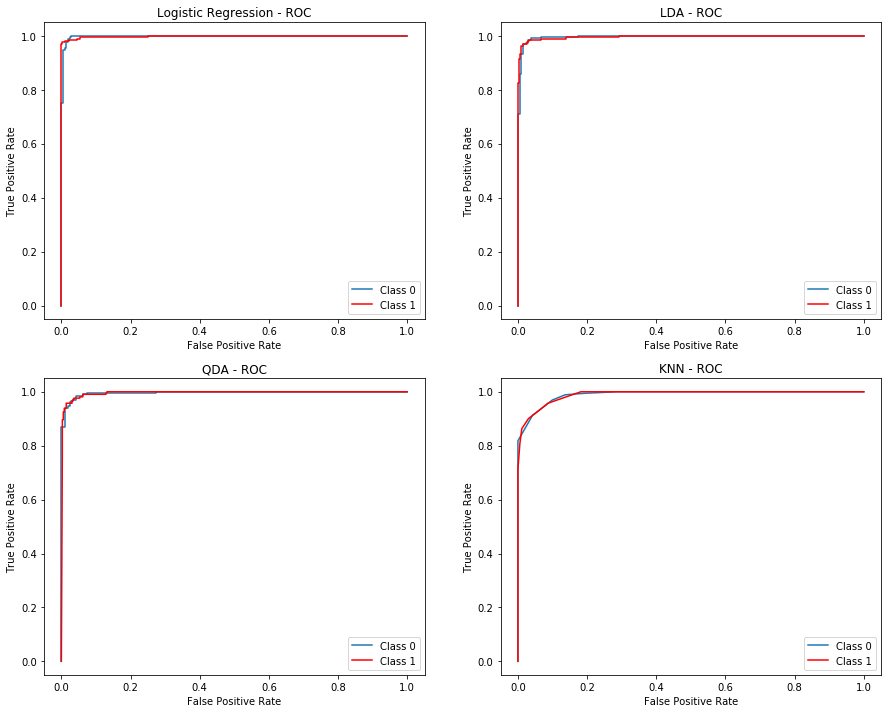

In [47]:
plt.figure(figsize=(15, 12))

plt.subplot(2,2,1)
plt.plot(fpr0_lr, tpr0_lr, "-", label = "Class 0")
plt.plot(fpr1_lr, tpr1_lr, "-", color = 'r', label = "Class 1")
plt.title("Logistic Regression - ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(2,2,2)
plt.plot(fpr0_lda, tpr0_lda, "-", label = "Class 0")
plt.plot(fpr1_lda, tpr1_lda, "-", color = 'r', label = "Class 1")
plt.title("LDA - ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(2,2,3)
plt.plot(fpr0_qda, tpr0_qda, "-", label = "Class 0")
plt.plot(fpr1_qda, tpr1_qda, "-", color = 'r', label = "Class 1")
plt.title("QDA - ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.subplot(2,2,4)
plt.plot(fpr0_knn, tpr0_knn, "-", label = "Class 0")
plt.plot(fpr1_knn, tpr1_knn, "-", color = 'r', label = "Class 1")
plt.title("KNN - ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.show()

## Classification Models PR curves

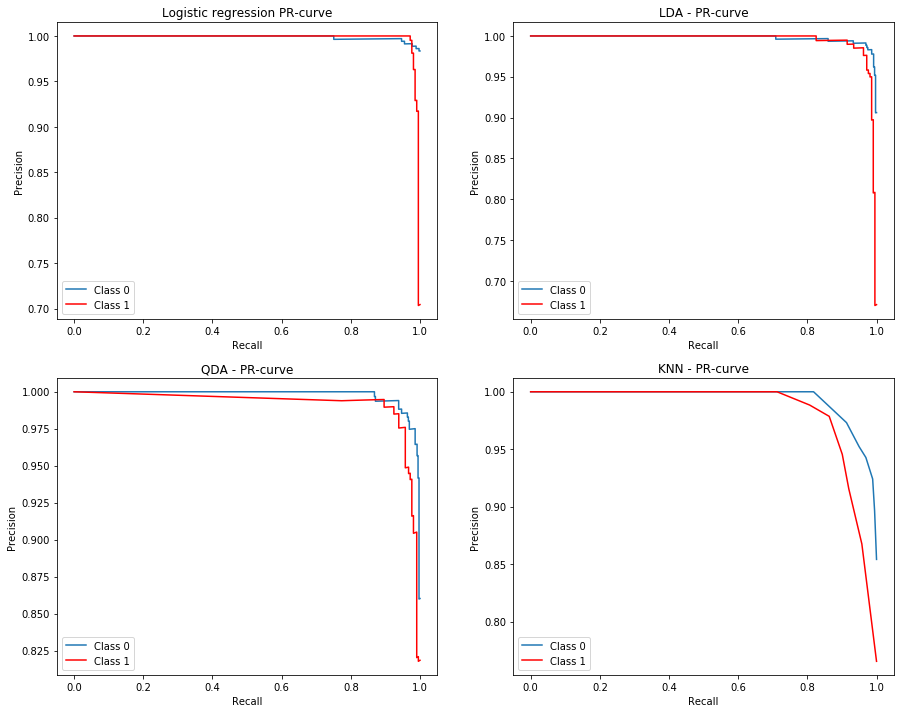

In [48]:
plt.figure(figsize=(15, 12))

plt.subplot(2,2,1)
plt.plot(r0_lr, p0_lr, "-", label = "Class 0")
plt.plot(r1_lr, p1_lr, "-", color = 'r', label = "Class 1")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Logistic regression PR-curve")

plt.subplot(2,2,2)
plt.plot(r0_lda, p0_lda, "-", label = "Class 0")
plt.plot(r1_lda, p1_lda, "-", color = 'r', label = "Class 1")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("LDA - PR-curve")

plt.subplot(2,2,3)
plt.plot(r0_qda, p0_qda, "-", label = "Class 0")
plt.plot(r1_qda, p1_qda, "-", color = 'r', label = "Class 1")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("QDA - PR-curve")

plt.subplot(2,2,4)
plt.plot(r0_knn, p0_knn, "-", label = "Class 0")
plt.plot(r1_knn, p1_knn, "-", color = 'r', label = "Class 1")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("KNN - PR-curve")

plt.show()